# Investment and Employment Survey Analysis

## Introduction

### Data Source: I had conducted a survey in the period of jun-jul of 2024
This dataset contains survey responses related to employment, investment habits, and financial decisions. The data includes information about respondents' demographic details, investment preferences, and compensation structures.

## Libraries Used

To analyze and visualize this dataset, I will use the following Python libraries:

- **Pandas**: For data manipulation and analysis.
- **NumPy**: For numerical operations and handling arrays.
- **Matplotlib**: For creating static, animated, and interactive visualizations.
- **Seaborn**: For statistical data visualization and making plots more visually appealing.

In [2]:
import pandas as pd
#reading the input data
rawData = pd.read_csv("survey.csv") 


In [8]:
#renaming the columns
rawData.rename(columns={"Are you employedld_col1": "Employed", "Do you invest the money earned or saved or received from family (if not employed currently) ?": "Investing","Where do you invest? (Select all the apply)":"Area of Investment","Do you get paid in ESOPs (employee stock ownership plan as a part of your CTC)?":"ESOPs","City of work (Write like this - Example: Pune, Maharashtra, India)":"Work city","Home town (Write like this - Example: Pune, Maharashtra, India)":"Hometown"}, inplace=True)

In [9]:
#seeing the columns
rawData.columns
rawData.head()

,Timestamp,Age (Complete),Gender,Are you employed,Investing,Area of Investment,ESOPs,Work city,Hometown
0,3/31/2024 16:06:03,26,Female,Yes,Yes,"Stocks, Gold/Silver/Platinum, Unit Linked Insu...",No,Nagpur,Nagpur
1,3/31/2024 16:12:11,26,Male,Yes,Yes,"Stocks, Mutual Fund, Bonds, Certificate of Dep...",Yes,"Bengaluru, India",Varanasi
2,3/31/2024 16:28:38,23,Female,Yes,Yes,National Pensions System,No,Indore,Narsinghpur
3,3/31/2024 16:33:00,27,Female,Yes,Yes,Mutual Fund,No,Nagpur,Nagpur
4,3/31/2024 16:34:29,26,Male,Yes,No,"Stocks, Mutual Fund, Real Estate, Gold/Silver/...",No,Nagpur,Nagpur


In [12]:
#installing libs for data viz creation
%pip install matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
rawData.columns

Index(['Timestamp', 'Age (Complete)', 'Gender', 'Are you employed',
       'Investing', 'Area of Investment', 'ESOPs', 'Work city', 'Hometown'],
      dtype='object')

In [51]:
rawData.columns

Index(['Timestamp', 'Age (Complete)', 'Gender', 'Are you employed',
       'Investing', 'Area of Investment', 'ESOPs', 'Work city', 'Hometown'],
      dtype='object')

In [59]:
# #people who do not invest

investmentCounts = rawData["Investing"].value_counts()
investmentCounts


Investing
Yes    128
No      42
Name: count, dtype: int64

In [ ]:
#but we will check if there are unemployed people who have selected No for investing and still have answered the areas where they invest money
#here we get the contracdictions
contradictions = rawData[
    ((rawData["Investing"] == "No") & (rawData["Area of Investment"]!="I do not invest" ) & (rawData["Are you employed"]=="No"))
]

print(f"Total contradictions found: {len(contradictions)}")
contradictions


Total contradictions found: 2


,Timestamp,Age (Complete),Gender,Are you employed,Investing,Area of Investment,ESOPs,Work city,Hometown
97,4/2/2024 13:39:40,32.0,Male,No,No,Stocks,No,"Berlin, India","Coimbra, Portugal"
157,4/3/2024 12:42:33,53.0,Female,No,No,Stocks,Yes,"Nagpur, Maharashtra India","Nagpur, Maharashtra, India"


In [ ]:
#here this 32 yo male has written work city as "Berlin, India" - this is wrong and needs to be removed
wrongEntries = rawData[rawData["Work city"] == "Berlin, India"]
wrongEntries


,Timestamp,Age (Complete),Gender,Are you employed,Investing,Area of Investment,ESOPs,Work city,Hometown
97,4/2/2024 13:39:40,32.0,Male,No,No,Stocks,No,"Berlin, India","Coimbra, Portugal"


In [70]:
rawData = rawData.drop(wrongEntries.index)

In [71]:
#checkingthe removal of wrong data
print(f"Entries left with 'Berlin, India': {len(rawData[rawData['Work city'] == 'Berlin, India'])}")


Entries left with 'Berlin, India': 0


In [78]:
# Case 1: Investing is "No" but "Area of Investment" is NOT "I do not invest"
contradictions1 = rawData[
    (rawData["Investing"] == "No") & 
    (rawData["Area of Investment"] != "I do not invest")
]
contradictions1

,Timestamp,Age (Complete),Gender,Are you employed,Investing,Area of Investment,ESOPs,Work city,Hometown
4,3/31/2024 16:34:29,26.0,Male,Yes,No,"Stocks, Mutual Fund, Real Estate, Gold/Silver/...",No,Nagpur,Nagpur
11,3/31/2024 16:47:21,26.0,Male,Yes,No,"Mutual Fund, Fixed Deposit",Yes,"Chennai, Tamil Nadu, India","Nagpur, Maharashtra"
62,4/1/2024 10:28:48,24.0,Female,Yes,No,Stocks,No,Nagpur,Ramakona
65,4/1/2024 11:20:03,26.0,Female,Yes,No,"Gold/Silver/Platinum, Fixed Deposit",No,"Pune, Maharashtra, India","Nagpur, Maharashtra, India"
77,4/1/2024 22:43:34,27.0,Male,Yes,No,Stocks,No,Gurugram,Nagpur
84,4/1/2024 23:11:14,27.0,Male,Yes,No,Mutual Fund,No,Pune,Ahmednagar
87,4/2/2024 10:04:45,27.0,Male,Yes,No,"Stocks, Mutual Fund, Gold/Silver/Platinum, Bonds",No,"Bengaluru, Karnataka, India","Nagpur, Maharashtra, India"
115,4/2/2024 17:40:11,22.0,Male,Yes,No,"Stocks, Mutual Fund, Fixed Deposit",No,Nagpur,Nagpur
128,4/2/2024 20:20:28,27.0,Female,Yes,No,"Fixed Deposit, National Pensions System, I do ...",No,Mumbai,Nagpur
132,4/2/2024 20:47:17,26.0,Female,Yes,No,"Stocks, Mutual Fund, Fixed Deposit, Public Pro...",No,"Nagpur, Maharashtra, India","Pulgaon, Maharashtra, India"


In [79]:
# we will see if they have selected other values with "I do not invest" in areas of investment
contradictions2 = contradictions1[
    (contradictions1["Area of Investment"].str.contains(",", na=False)) &  # Multiple values present
    (contradictions1["Area of Investment"].str.contains("I do not invest", case=False, na=False))  # Includes 'I do not invest'
]

print(f"Total new contradictions found: {len(contradictions2)}")
contradictions2

Total new contradictions found: 1


,Timestamp,Age (Complete),Gender,Are you employed,Investing,Area of Investment,ESOPs,Work city,Hometown
128,4/2/2024 20:20:28,27.0,Female,Yes,No,"Fixed Deposit, National Pensions System, I do ...",No,Mumbai,Nagpur


In [80]:
#removing this from original data
rawData = rawData.drop(contradictions2.index)


In [81]:
#now let us check for contradictions1 again

contradictions1 = rawData[
    (rawData["Investing"] == "No") & 
    (rawData["Area of Investment"] != "I do not invest")
]
contradictions1

,Timestamp,Age (Complete),Gender,Are you employed,Investing,Area of Investment,ESOPs,Work city,Hometown
4,3/31/2024 16:34:29,26.0,Male,Yes,No,"Stocks, Mutual Fund, Real Estate, Gold/Silver/...",No,Nagpur,Nagpur
11,3/31/2024 16:47:21,26.0,Male,Yes,No,"Mutual Fund, Fixed Deposit",Yes,"Chennai, Tamil Nadu, India","Nagpur, Maharashtra"
62,4/1/2024 10:28:48,24.0,Female,Yes,No,Stocks,No,Nagpur,Ramakona
65,4/1/2024 11:20:03,26.0,Female,Yes,No,"Gold/Silver/Platinum, Fixed Deposit",No,"Pune, Maharashtra, India","Nagpur, Maharashtra, India"
77,4/1/2024 22:43:34,27.0,Male,Yes,No,Stocks,No,Gurugram,Nagpur
84,4/1/2024 23:11:14,27.0,Male,Yes,No,Mutual Fund,No,Pune,Ahmednagar
87,4/2/2024 10:04:45,27.0,Male,Yes,No,"Stocks, Mutual Fund, Gold/Silver/Platinum, Bonds",No,"Bengaluru, Karnataka, India","Nagpur, Maharashtra, India"
115,4/2/2024 17:40:11,22.0,Male,Yes,No,"Stocks, Mutual Fund, Fixed Deposit",No,Nagpur,Nagpur
132,4/2/2024 20:47:17,26.0,Female,Yes,No,"Stocks, Mutual Fund, Fixed Deposit, Public Pro...",No,"Nagpur, Maharashtra, India","Pulgaon, Maharashtra, India"
150,4/3/2024 7:19:23,26.0,Male,Yes,No,"Stocks, Mutual Fund, Gold/Silver/Platinum, Bon...",No,Hyderabad,Nagpur


In [ ]:
#people who are not employed but have esops = contradictions3 -> to be removed
contradictions3 = rawData[
    (rawData["Are you employed"] == "No") & 
    (rawData["ESOPs"] == "Yes") & 
    (rawData["Area of Investment"].str.contains("stock", case=False, na=False))
]

rawData = rawData.drop(contradictions3.index)

In [86]:
#checking again
contradictionsRemaining = rawData[
    (rawData["Investing"] == "No") & 
    (rawData["Area of Investment"] != "I do not invest")
]

print(f"Total contradictions found: {len(contradictionsRemaining)}")
contradictionsRemaining


Total contradictions found: 10


,Timestamp,Age (Complete),Gender,Are you employed,Investing,Area of Investment,ESOPs,Work city,Hometown
4,3/31/2024 16:34:29,26.0,Male,Yes,No,"Stocks, Mutual Fund, Real Estate, Gold/Silver/...",No,Nagpur,Nagpur
11,3/31/2024 16:47:21,26.0,Male,Yes,No,"Mutual Fund, Fixed Deposit",Yes,"Chennai, Tamil Nadu, India","Nagpur, Maharashtra"
62,4/1/2024 10:28:48,24.0,Female,Yes,No,Stocks,No,Nagpur,Ramakona
65,4/1/2024 11:20:03,26.0,Female,Yes,No,"Gold/Silver/Platinum, Fixed Deposit",No,"Pune, Maharashtra, India","Nagpur, Maharashtra, India"
77,4/1/2024 22:43:34,27.0,Male,Yes,No,Stocks,No,Gurugram,Nagpur
84,4/1/2024 23:11:14,27.0,Male,Yes,No,Mutual Fund,No,Pune,Ahmednagar
87,4/2/2024 10:04:45,27.0,Male,Yes,No,"Stocks, Mutual Fund, Gold/Silver/Platinum, Bonds",No,"Bengaluru, Karnataka, India","Nagpur, Maharashtra, India"
115,4/2/2024 17:40:11,22.0,Male,Yes,No,"Stocks, Mutual Fund, Fixed Deposit",No,Nagpur,Nagpur
132,4/2/2024 20:47:17,26.0,Female,Yes,No,"Stocks, Mutual Fund, Fixed Deposit, Public Pro...",No,"Nagpur, Maharashtra, India","Pulgaon, Maharashtra, India"
150,4/3/2024 7:19:23,26.0,Male,Yes,No,"Stocks, Mutual Fund, Gold/Silver/Platinum, Bon...",No,Hyderabad,Nagpur


In [87]:
#final check
# Finding records where "I do not invest" is present along with other values
contradictionsWithExtraValues = contradictionsRemaining[
    contradictionsRemaining["Area of Investment"].str.contains(r".*,.*I do not invest|I do not invest,.*", case=False, regex=True)
]

print(f"Total contradictions found with extra values: {len(contradictionsWithExtraValues)}")
contradictionsWithExtraValues


Total contradictions found with extra values: 0


,Timestamp,Age (Complete),Gender,Are you employed,Investing,Area of Investment,ESOPs,Work city,Hometown


In [88]:
# Updating 'Investing' to 'Yes' where it is 'No' but valid investments exist
rawData.loc[
    (rawData["Investing"] == "No") & 
    (~rawData["Area of Investment"].str.contains("I do not invest", case=False, na=False)),
    "Investing"
] = "Yes"

In [89]:
#checking if still any contradictions
contradictionsRemaining = rawData[
    (rawData["Investing"] == "No") & 
    (~rawData["Area of Investment"].str.contains("I do not invest", case=False, na=False))
]
print(f"Total contradictions found: {len(contradictionsRemaining)}")
contradictionsRemaining

Total contradictions found: 0


,Timestamp,Age (Complete),Gender,Are you employed,Investing,Area of Investment,ESOPs,Work city,Hometown


In [91]:
#final check 
# Checking unique values in 'Area of Investment' where 'Investing' is 'No'
uniqueInvestments = rawData.loc[rawData["Investing"] == "No", "Area of Investment"].unique()

print("Unique values in 'Area of Investment' where 'Investing' is 'No':", uniqueInvestments)


Unique values in 'Area of Investment' where 'Investing' is 'No': ['I do not invest']


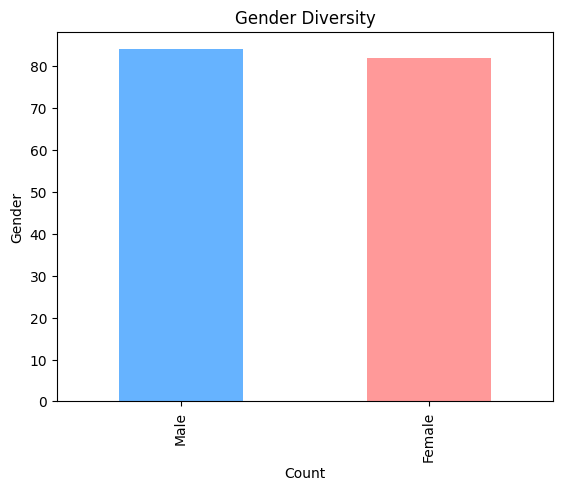

In [92]:
#data viz for gender
genderCount = rawData['Gender'].value_counts()

import matplotlib.pyplot as plt

genderCount.plot(kind="bar", color=["#66b3ff", "#ff9999"])
plt.xlabel("Count")
plt.ylabel("Gender")
plt.title("Gender Diversity")
plt.show()


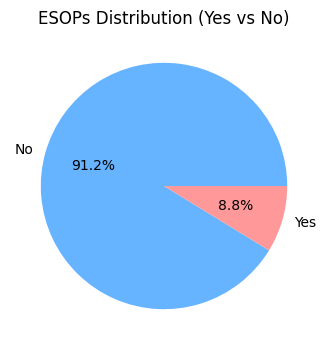

In [93]:
esopCount = rawData['ESOPs'].value_counts()
# print(type(rawData['ESOPs'].value_counts()))
import matplotlib.pyplot as plt

plt.figure(figsize=(4,4))
plt.pie(esopCount, labels=esopCount.index, autopct="%1.1f%%", colors=["#66b3ff", "#ff9999"])
plt.title("ESOPs Distribution (Yes vs No)")
plt.show()

In [94]:
#counting the gender values
rawData['Gender'].value_counts()

Gender
Male      84
Female    82
Name: count, dtype: int64

In [95]:
#checking how many men and women get esops
rawData.groupby("Gender")["ESOPs"].value_counts().unstack()

ESOPs,No,Yes
Gender,,
Female,74,6
Male,72,8


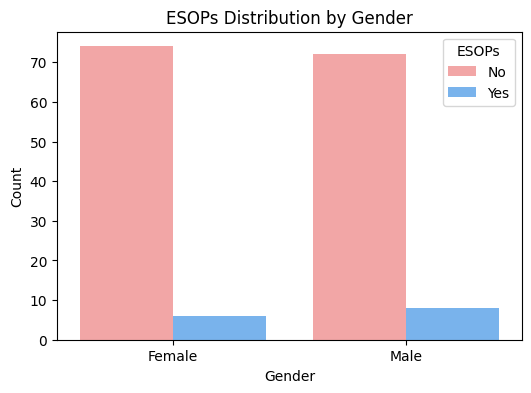

In [96]:
#data viz based on how many men and women get esop or not
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x="Gender", hue="ESOPs", data=rawData, palette=["#FF9999", "#66B3FF"])

plt.title("ESOPs Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="ESOPs")
plt.show()


In [98]:

print(rawData["Age (Complete)"].dtype) #checking data type
#conversion to numbers
rawData["Age (Complete)"] = pd.to_numeric(rawData["Age (Complete)"], errors="coerce")



float64


In [97]:
#age
print(f"Maximum age of the participants in the survey: {rawData['Age (Complete)'].max():.1f}")
print(f"Minimum age of the participants in the survey: {rawData['Age (Complete)'].min():.1f}")
print(f"Average age of the participants in the survey: {rawData['Age (Complete)'].mean():.1f}")

Maximum age of the participants in the survey: 68.0
Minimum age of the participants in the survey: 16.0
Average age of the participants in the survey: 29.7


(0.0, 78.0)

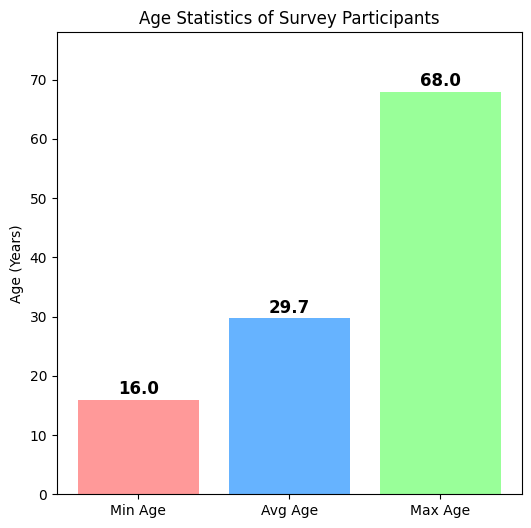

In [101]:
#infographic on age analysis

#value extraction
minAge = rawData['Age (Complete)'].min()
avgAge = rawData['Age (Complete)'].mean()
maxAge = rawData['Age (Complete)'].max()



#labels & values
ageLabels = ['Min Age','Avg Age','Max Age']
ageValues = [minAge,avgAge,maxAge]

#colors for infographic style
colors=["#ff9999", "#66b3ff", "#99ff99"]

#plotting
plt.figure(figsize=(6,6))
plt.bar(ageLabels,ageValues,color=colors)

# Adding value labels on top
for i, v in enumerate(ageValues):
    plt.text(i, v + 1, f"{v:.1f}", ha='center', fontsize=12, fontweight='bold')

plt.ylabel("Age (Years)")
plt.title("Age Statistics of Survey Participants")
plt.ylim(0, maxAge + 10)


In [102]:
#stats of age
rawData['Age (Complete)'].describe()

count    160.00000
mean      29.68750
std        9.78459
min       16.00000
25%       24.75000
50%       26.00000
75%       29.00000
max       68.00000
Name: Age (Complete), dtype: float64

In [111]:
rawData['Area of Investment'].unique()

array(['Stocks, Gold/Silver/Platinum, Unit Linked Insurance Plans',
       'Stocks, Mutual Fund, Bonds, Certificate of Deposit, Fixed Deposit, Public Provident Fund, National Pensions System',
       'National Pensions System', 'Mutual Fund',
       'Stocks, Mutual Fund, Real Estate, Gold/Silver/Platinum, Public Provident Fund',
       'Mutual Fund, Fixed Deposit, Public Provident Fund',
       'Stocks, Mutual Fund, Gold/Silver/Platinum',
       'Stocks, Gold/Silver/Platinum, Bonds, Fixed Deposit',
       'Fixed Deposit, Public Provident Fund', 'Stocks',
       'Mutual Fund, Fixed Deposit', 'Stocks, Mutual Fund',
       'Stocks, Mutual Fund, Real Estate, Gold/Silver/Platinum, Bonds, Certificate of Deposit, Fixed Deposit, Unit Linked Insurance Plans',
       'Mutual Fund, Fixed Deposit, Unit Linked Insurance Plans',
       'Stocks, Mutual Fund, Gold/Silver/Platinum, Bonds, Certificate of Deposit, Fixed Deposit',
       'Stocks, Mutual Fund, Real Estate, Gold/Silver/Platinum',
       'St

In [ ]:
# when we filter for 'Investing' == 'Yes' 
filteredData = rawData.loc[rawData["Investing"] == "Yes",'Area of Investment']

# Remove Null values, split using comma, trim spaces for unique values
uniqueInvestments = pd.Series(
    ', '.join(filteredData.dropna()).split(',')
).str.strip().value_counts()

print("Unique values and their counts:\n", uniqueInvestments)


Unique values and their counts:
 Mutual Fund                        97
Stocks                             86
Fixed Deposit                      61
Gold/Silver/Platinum               54
Public Provident Fund              47
National Pensions System           19
Bonds                              18
Unit Linked Insurance Plans        16
Real Estate                        16
Certificate of Deposit              7
Senior Citizen's Savings Scheme     3
LIC                                 1
Crypto                              1
Index                               1
RD                                  1
                                    1
Derivatives                         1
crypto                              1
Name: count, dtype: int64


In [112]:
#replacing 
rawData["Area of Investment"] = rawData["Area of Investment"].replace(
    {"RD": "Recurring Deposits", "crypto": "Crypto"}, regex=True
)


In [ ]:
#checking values again
# when we filter for 'Investing' == 'Yes' 
filteredData = rawData.loc[rawData["Investing"] == "Yes",'Area of Investment']

# Remove Null values, split using comma, trim spaces for unique values
uniqueInvestments = pd.Series(
    ', '.join(filteredData.dropna()).split(',')
).str.strip().value_counts()

print("Unique values and their counts:\n", uniqueInvestments)

Unique values and their counts:
 Mutual Fund                        97
Stocks                             86
Fixed Deposit                      61
Gold/Silver/Platinum               54
Public Provident Fund              47
National Pensions System           19
Bonds                              18
Unit Linked Insurance Plans        16
Real Estate                        16
Certificate of Deposit              7
Senior Citizen's Savings Scheme     3
Crypto                              2
LIC                                 1
Index                               1
Recurring Deposits                  1
                                    1
Derivatives                         1
Name: count, dtype: int64


In [114]:
#replacing 
rawData["Area of Investment"] = rawData["Area of Investment"].replace(
    {"LIC": "Unit Linked Insurance Plans"}, regex=True
)

In [ ]:
#checking values again
# when we filter for 'Investing' == 'Yes' 
filteredData = rawData.loc[rawData["Investing"] == "Yes",'Area of Investment']

# Remove Null values, split using comma, trim spaces for unique values
uniqueInvestments = pd.Series(
    ', '.join(filteredData.dropna()).split(',')
).str.strip().value_counts()

print("Unique values and their counts:\n", uniqueInvestments)

Unique values and their counts:
 Mutual Fund                        97
Stocks                             86
Fixed Deposit                      61
Gold/Silver/Platinum               54
Public Provident Fund              47
National Pensions System           19
Bonds                              18
Unit Linked Insurance Plans        17
Real Estate                        16
Certificate of Deposit              7
Senior Citizen's Savings Scheme     3
Crypto                              2
Index                               1
Recurring Deposits                  1
                                    1
Derivatives                         1
Name: count, dtype: int64


In [121]:
# Convert to DataFrame
investmentType = uniqueInvestments.reset_index()
investmentType.columns = ["Investment Type", "Count"]
investmentType

,Investment Type,Count
0,Mutual Fund,97
1,Stocks,86
2,Fixed Deposit,61
3,Gold/Silver/Platinum,54
4,Public Provident Fund,47
5,National Pensions System,19
6,Bonds,18
7,Unit Linked Insurance Plans,17
8,Real Estate,16
9,Certificate of Deposit,7


In [122]:
investmentType = investmentType[investmentType["Investment Type"] != ""]
investmentType

,Investment Type,Count
0,Mutual Fund,97
1,Stocks,86
2,Fixed Deposit,61
3,Gold/Silver/Platinum,54
4,Public Provident Fund,47
5,National Pensions System,19
6,Bonds,18
7,Unit Linked Insurance Plans,17
8,Real Estate,16
9,Certificate of Deposit,7


In [131]:
print(investmentType.head())
print(type(investmentType))


         Investment Type  Count
0            Mutual Fund     97
1                 Stocks     86
2          Fixed Deposit     61
3   Gold/Silver/Platinum     54
4  Public Provident Fund     47
<class 'pandas.core.frame.DataFrame'>


C:\Users\Aditi\AppData\Local\Temp\ipykernel_24400\3157165456.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=investmentType["Investment Type"], y=investmentType["Count"], palette="viridis")


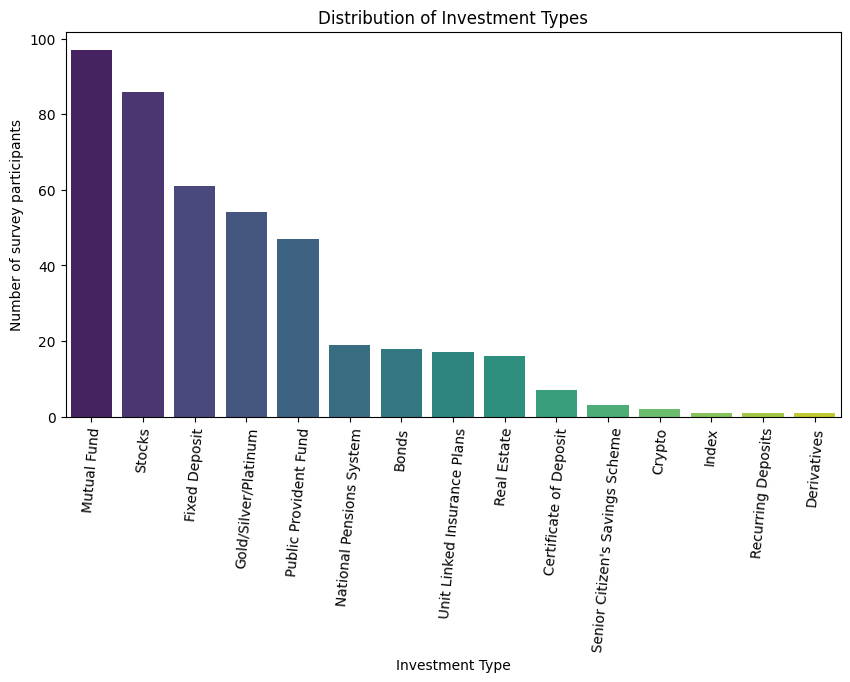

In [139]:
plt.figure(figsize=(10,5))
sns.barplot(x=investmentType["Investment Type"], y=investmentType["Count"], palette="viridis")
plt.xticks(rotation=85)
plt.xlabel("Investment Type")
plt.ylabel("Number of survey participants")
plt.title("Distribution of Investment Types")
plt.show()
